# Configuración previa

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import tensor_util
import seaborn as sns
import os
import datetime
import random

#interactive graphs
import plotly.express as px
import plotly.figure_factory as fig_fact
import plotly.graph_objects as graph_objects


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense

import statsmodels.api as sm
import dataframe_image as dfi

In [ ]:
sns.set()
sns.set_palette("pastel")
PATH='/Users/luismerinoulizarna/workspace/personal/TFM/'
pd.options.plotting.backend = "plotly"

#Función que muestra el número exacto de apariencias encima de la barra de un diagrama
def print_bar_values(total_values, diagram, horizontal_alignment='center'):
    for i, value in enumerate(total_values):
        diagram.text(i, value, value, ha=horizontal_alignment)

# Carga de datos

In [ ]:
df = pd.read_csv("~/Downloads/diabetes.csv")

target = df['Outcome']
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Eliminar columna objetivo y mantener las features

In [ ]:

# Dataframe without target colum
features_df = df.drop('Outcome', axis=1)
features_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:

features = df.columns
features = features.delete(len(features) - 1)
features = features.tolist()
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## Comprobación de que todas las pacientes son mayores de 21

In [ ]:
df[df['Age']>=21].size == df.size

True

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df_describe = df.describe().round(2).T
dfi.export(df_describe, f"{PATH}/graphics/dataframes/df_initial_describe.png")

df_describe

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


# Rescalado y normalización

## Rescalado de datos con sklearn

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df_to_scale = features_df
df_rescaled = pd.DataFrame(scaler.fit_transform(df_to_scale), columns=df_to_scale.columns)

In [ ]:
df_rescaled.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.0,0.347243,0.253629,0.183333


## Normalización

In [ ]:
df_normalized = (df_rescaled - df_rescaled.mean()) / df_rescaled.std()
df_normalized.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515


# Gráficos

## Gráfica de valores NaN

In [ ]:
print("Hay valores no numéricos (NaN - Not a Number)?: ", df.isna().values.any())
print("Hay valores nulos?: ", df.isnull().values.any())

Hay valores no numéricos (NaN - Not a Number)?:  False
Hay valores nulos?:  False


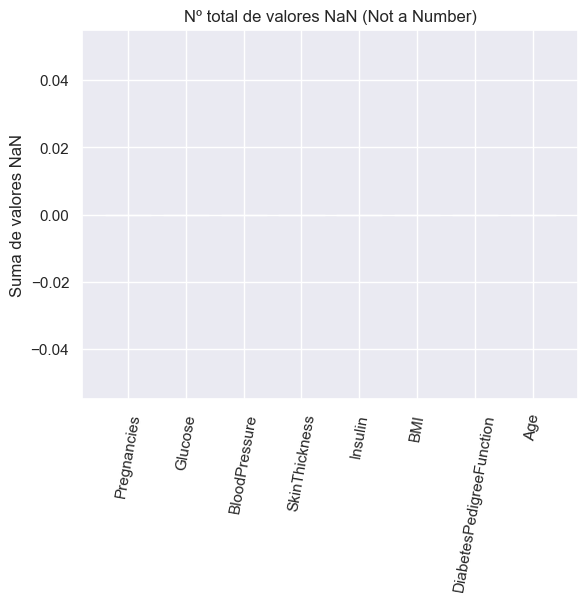

In [ ]:

total_nan_values = df.isna().values.sum()

plt.title("Nº total de valores NaN (Not a Number)")

plt.bar(features_df.columns, total_nan_values, color='skyblue')

plt.ylabel('Suma de valores NaN')
plt.xticks(rotation=80)
plt.savefig(f'{PATH}/graphics/Gráfico-valores-nan-diabetes.png',bbox_inches='tight')


plt.show()

## Gráfica de valores nulos

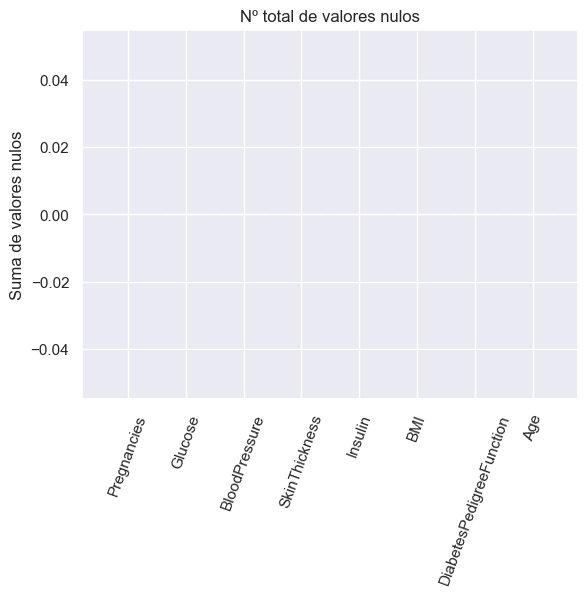

In [ ]:

total_null_values = df.isnull().values.sum()


plt.title("Nº total de valores nulos")

bars = plt.bar(features_df.columns, total_null_values, color='skyblue')

plt.ylabel('Suma de valores nulos')
plt.xticks(rotation=70)
plt.savefig(f'{PATH}/graphics/Gráfico-valores-nu-diabetes.png', bbox_inches='tight')

plt.show()

## Gráfico de variable objetivo (Outcome)

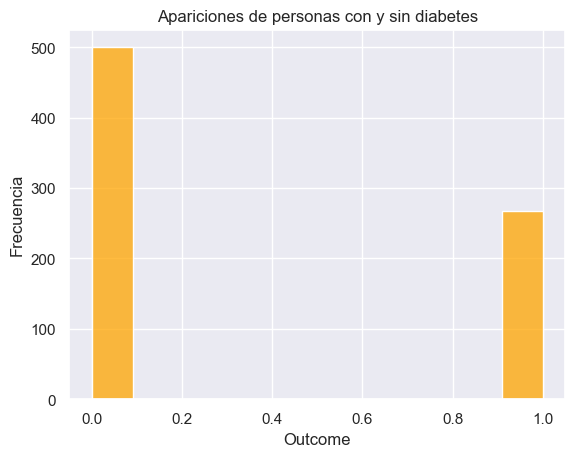

In [ ]:

#Relación de personas con/sin diabetes

bars = sns.histplot(df['Outcome'], color='orange')

plt.title("Apariciones de personas con y sin diabetes")
plt.xlabel('Outcome')
plt.ylabel('Frecuencia')
plt.savefig(f'{PATH}/graphics/balance-personas-con-y-sin-diabetes.png', bbox_inches='tight')
plt.show()

In [ ]:
outcome_count = df['Outcome'].value_counts()
print(f"Hay un total de {outcome_count[0]} pacientes SIN diabetes y un total de {outcome_count[1]} CON diabetes")

Hay un total de 500 pacientes SIN diabetes y un total de 268 CON diabetes


### Plotly

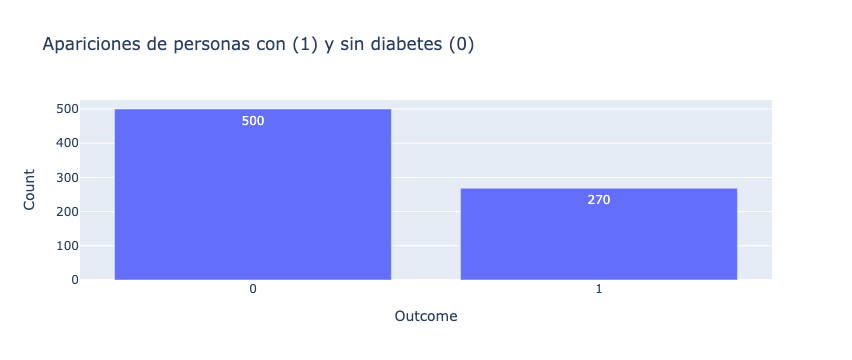

In [ ]:
df_outcome = pd.DataFrame({ 'Outcome': ['0', '1'],
                            'Count': [df[df['Outcome']==0].shape[0], df[df['Outcome']==1].shape[0]] })
fig = px.bar(df_outcome, x='Outcome', y='Count',  text_auto='.2s', title='Apariciones de personas con (1) y sin diabetes (0)')
fig.show()

## Rango de edad de los pacientes (plotly)

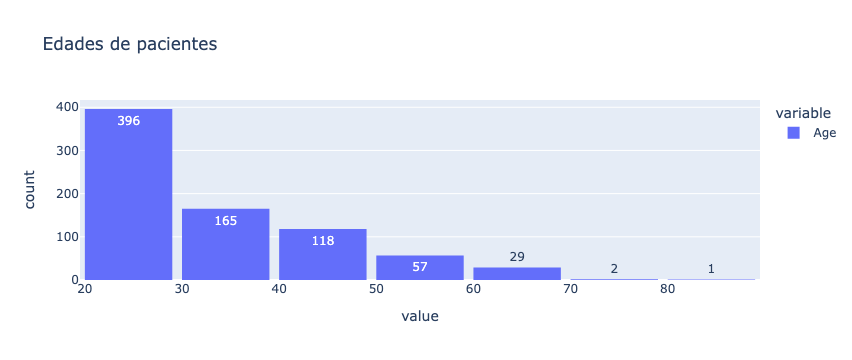

In [ ]:
fig = px.histogram(df['Age'], nbins=10, text_auto='d', title="Edades de pacientes")

fig.update_layout(bargap=0.1)

fig.show()

In [ ]:
### Contar cuántos registros caen en cada rango
age_range = [20, 30, 40, 50, 60, 70, 80, 90, 100]
df_range = df
df_range['Rango de edad'] = pd.cut(df['Age'], bins=age_range)
conteo_por_rango = df_range['Rango de edad'].value_counts()

df_conteo= pd.DataFrame(conteo_por_rango)
df_conteo= df_conteo.rename(columns={'count':'Nº de pacientes'})
dfi.export(df_conteo.T, f"{PATH}/graphics/dataframes/df_rango_edad_pacientes.png")
df_conteo.T

Rango de edad,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
Nº de pacientes,417,157,113,54,25,1,1,0


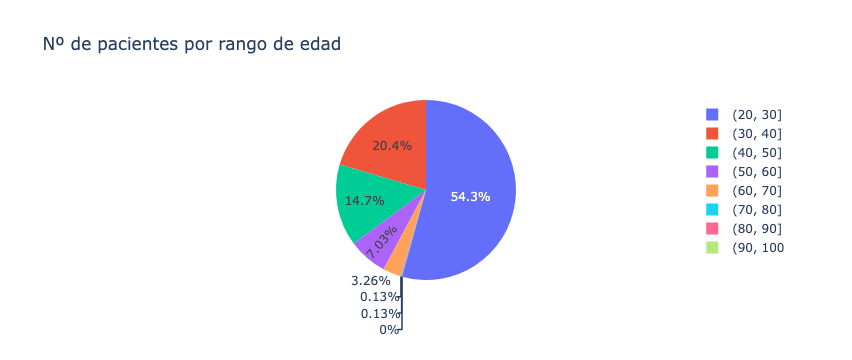

In [ ]:
groups = ['(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]', '(90, 100]']
fig = px.pie(values=df_conteo['Nº de pacientes'], names=groups, title='Nº de pacientes por rango de edad')
fig.show()

# Análisis de distribuciones
Distrubuciones de probabilidad de las columnas de interés

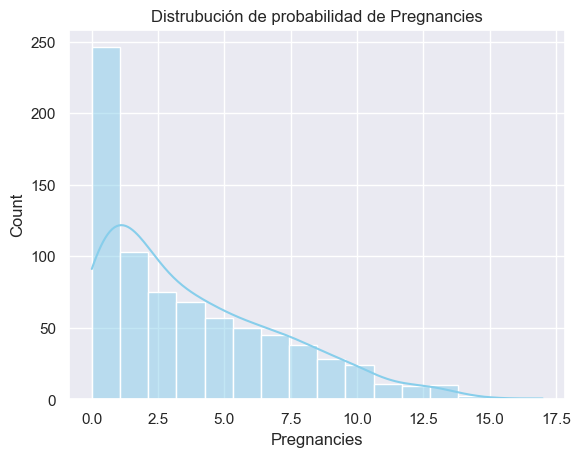

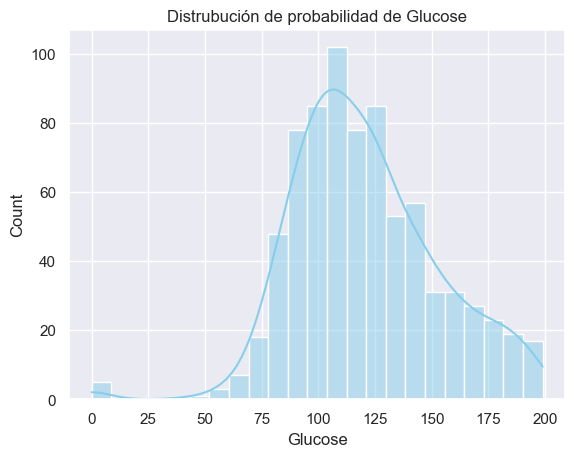

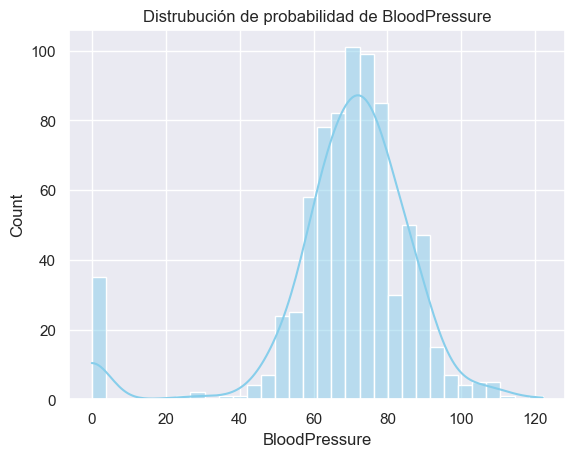

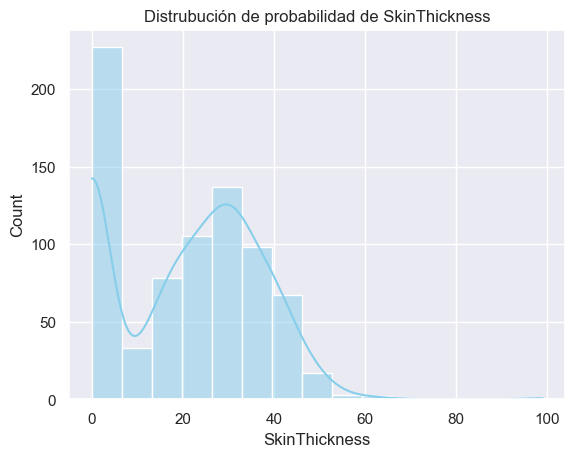

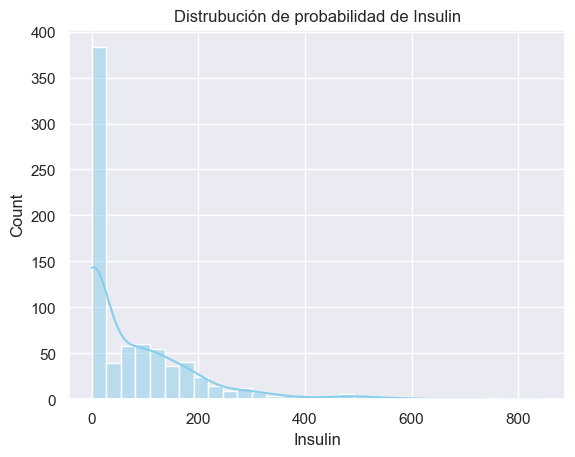

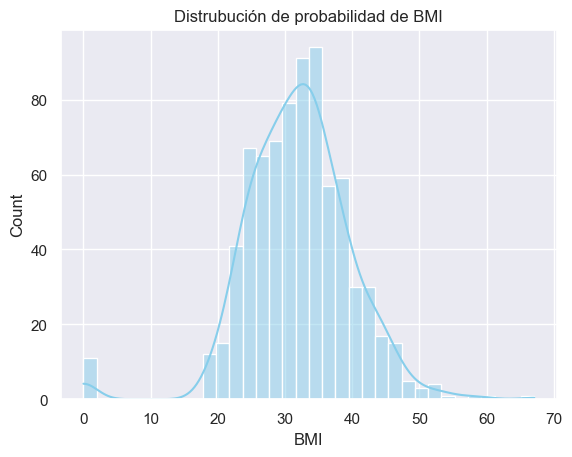

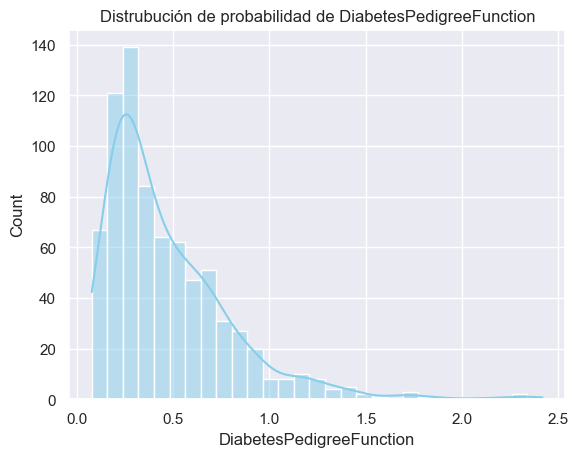

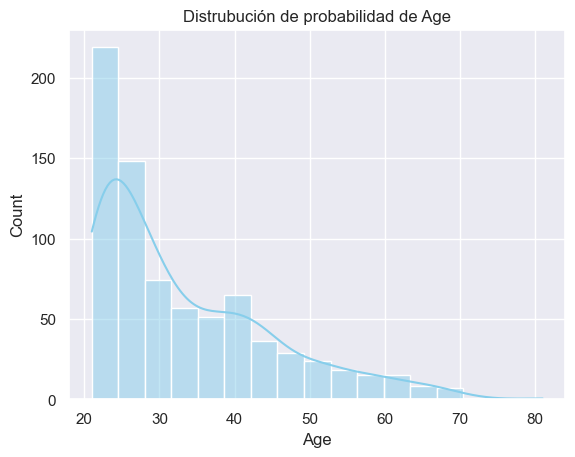

In [ ]:
#%%capture
for i, feature in enumerate(features):
    plt.title(f"Distrubución de probabilidad de {feature}")
    ax = sns.histplot(df[features[i]], kde=True, color='skyblue')
    #plt.savefig(f"{PATH}/graphics/distrib-prob/dist-prob-{feature}.png", bbox_inches='tight')
    plt.show()

### Plotly histogramas

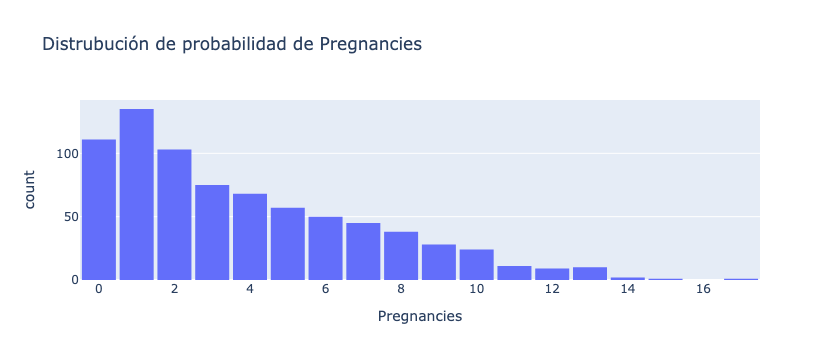

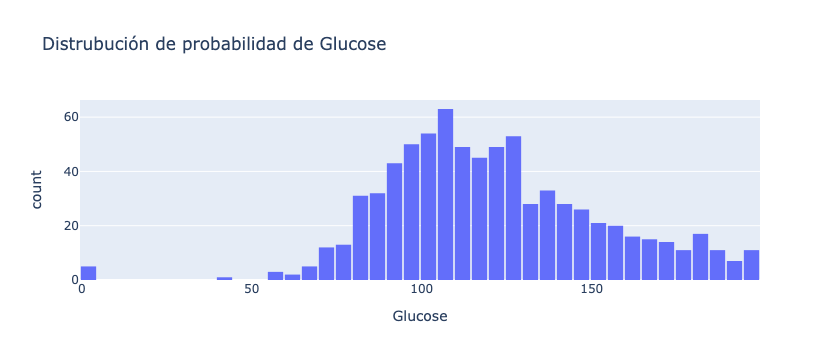

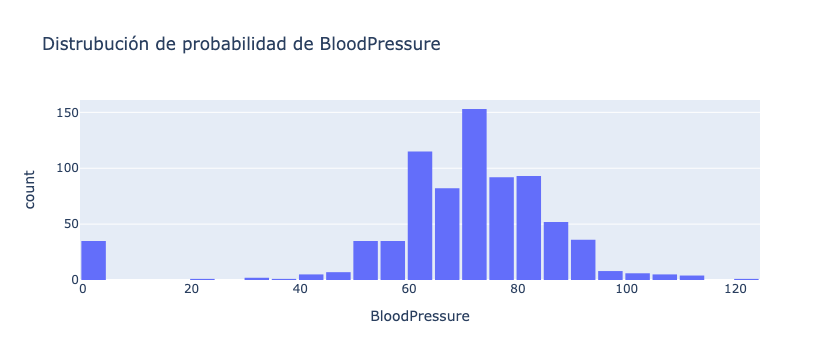

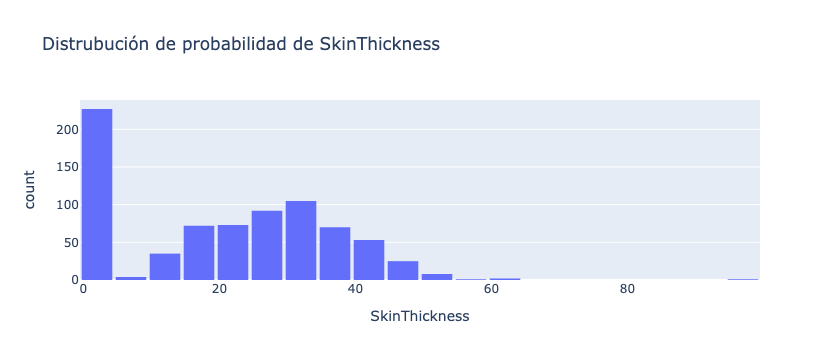

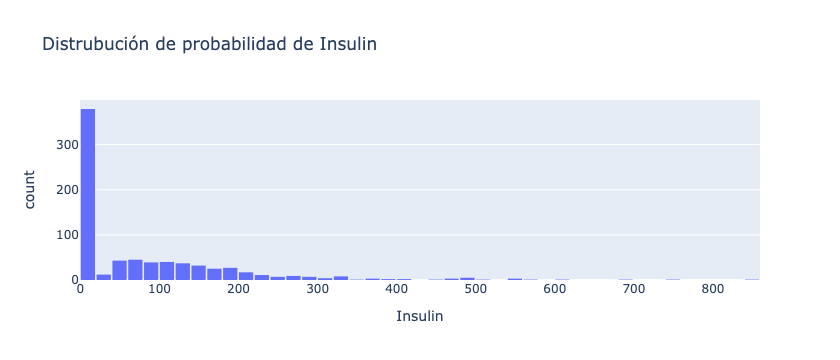

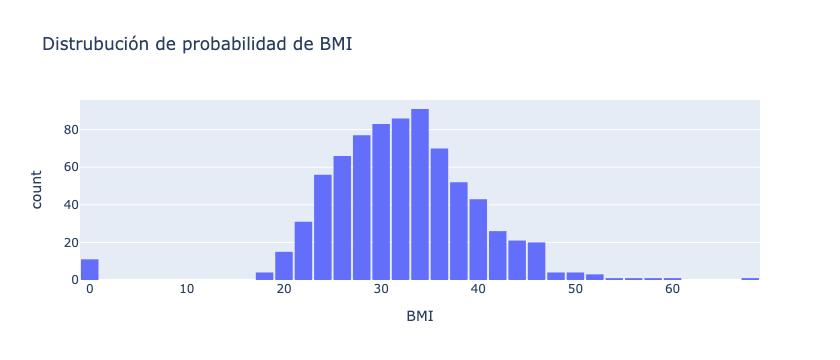

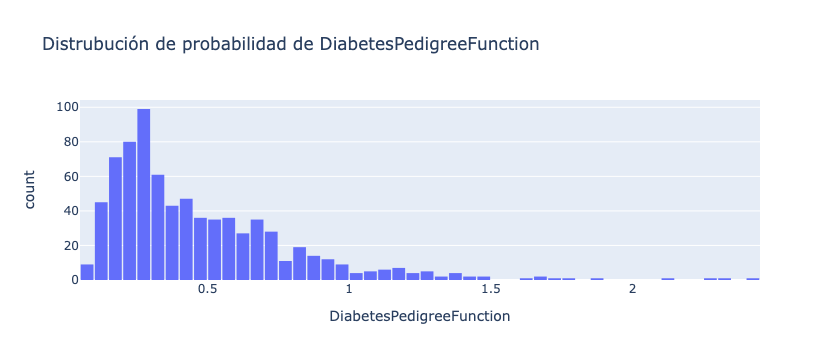

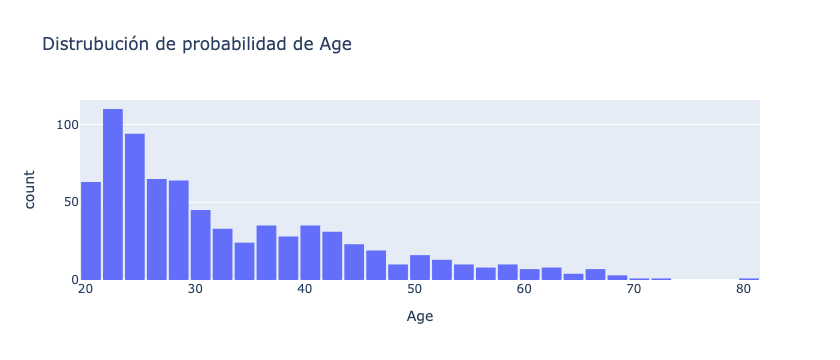

In [ ]:
for _, feature in enumerate(features):
    fig = px.histogram(df, x=feature, title=f"Distrubución de probabilidad de {feature}")
    fig.update_layout(bargap=0.1)
    fig.show()

## Matriz de correlación

In [ ]:
df.drop('Rango de edad', axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
corr = features_df.set_index('Glucose').corr()

### Plotly

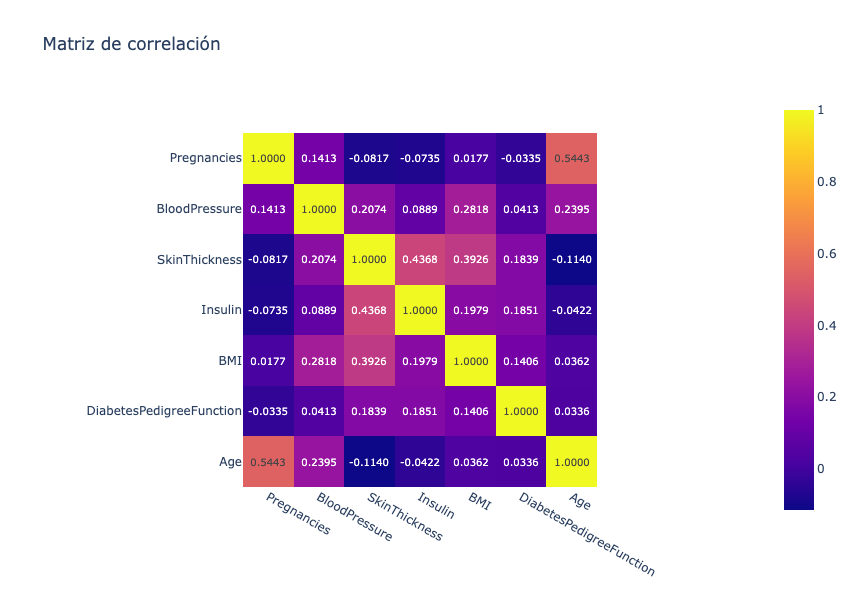

In [ ]:
fig = px.imshow(corr, width=600, height=600, text_auto='.4f', title="Matriz de correlación")
fig.show()

## Gráfico de dispersión

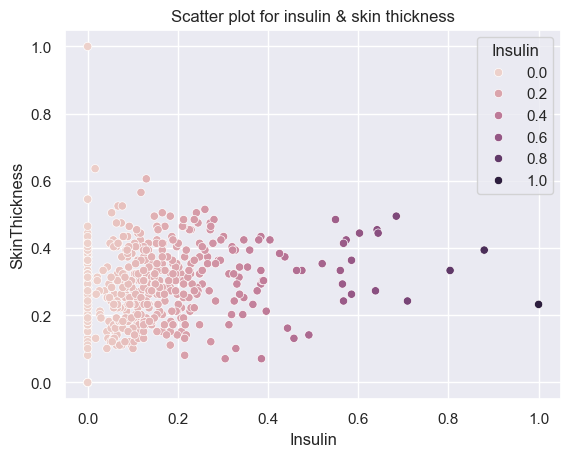

In [ ]:
insulin = df_rescaled['Insulin']
skin_thickness = df_rescaled['SkinThickness']

plt.title("Scatter plot for insulin & skin thickness")
sns.scatterplot(x=insulin, y=skin_thickness, hue=insulin, data=df)

plt.show()

### Plotly

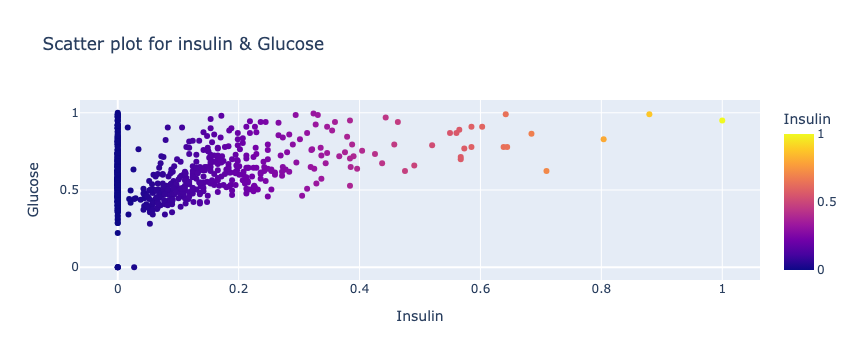

In [ ]:
fig = px.scatter(df_rescaled, x='Insulin', y='Glucose', color="Insulin", title="Scatter plot for insulin & Glucose")
fig.show()

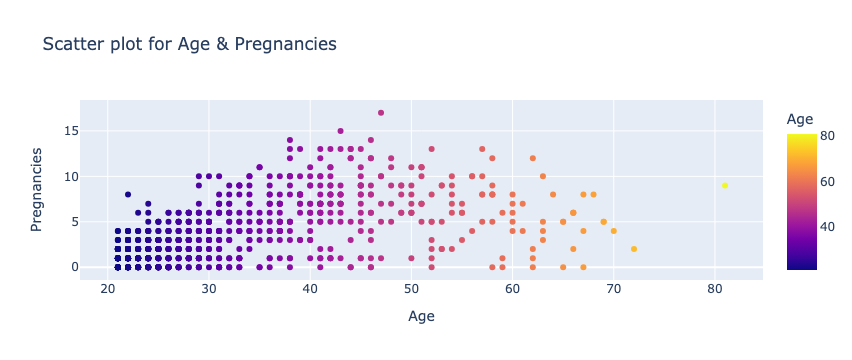

In [ ]:
fig = px.scatter(df, x='Age', y='Pregnancies', color="Age", title="Scatter plot for Age & Pregnancies")
fig.show()

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Scatter plot for Insulin & Glucose'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by Insulin :"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=2.5, step=0.1,
        marks={0: '0', 2.5: '2.5'},
        value=[0.5, 2]
    ),
])


@app.callback(
    Output("scatter-plot", "figure"),
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = df_rescaled
    low, high = slider_range
    mask = (df_rescaled['Insulin'] > low) & (df_rescaled['Insulin'] < high)
    fig = px.scatter(df_rescaled[mask], x="Insulin", y="Glucose", color="Insulin")
    return fig


app.run_server(debug=True)

In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('Scatter plot for Ages & Pregnancies'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by Age :"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=100, step=0.1,
        marks={0: '0', 100: '100'},
        value=[0.5, 2]
    ),
])


@app.callback(
    Output("scatter-plot", "figure"),
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = df_rescaled
    low, high = slider_range
    mask = (df_rescaled['Age'] > low) & (df_rescaled['Age'] < high)
    fig = px.scatter(df_rescaled[mask], x="Age", y="Pregnancies", color="Age")
    return fig


app.run_server(debug=True)

# Análisis estadístico

In [ ]:
df_stats = features_df.describe().T
df_stats

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [ ]:
df_stats['mean']

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Name: mean, dtype: float64

In [ ]:
count_0_values = (df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum()
count_0_values

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

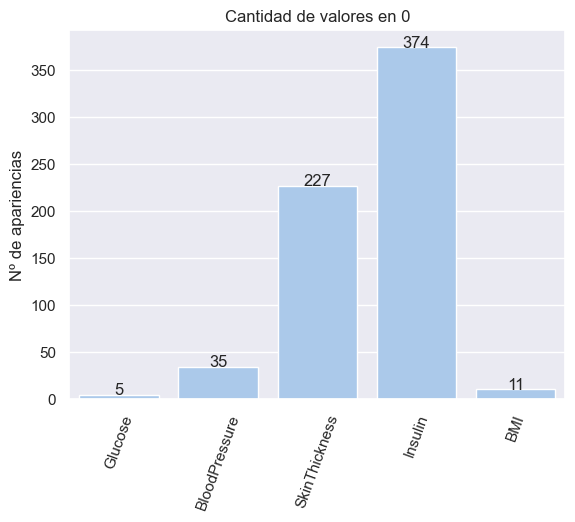

In [ ]:
features_with_0 = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
x = np.arange(len(features_with_0))

plt.title("Cantidad de valores en 0")

bars = sns.barplot(x=features_with_0, y=count_0_values)

plt.xticks(rotation=70)
plt.ylabel("Nº de apariencias")
print_bar_values(count_0_values, plt)
plt.savefig(f'{PATH}/graphics/total-0-values-features-with-0', bbox_inches='tight')
plt.show()

### Plotly

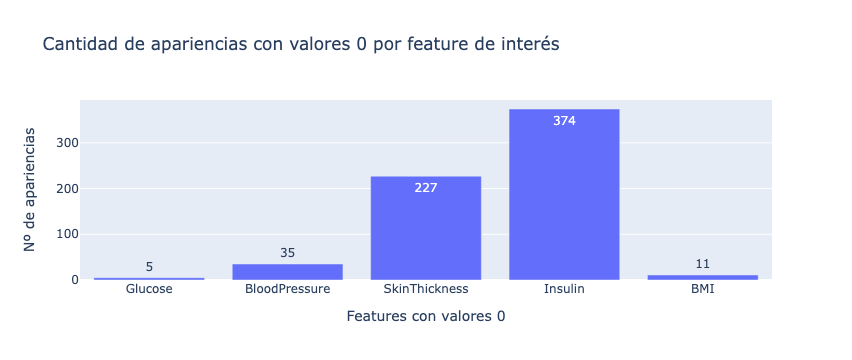

In [ ]:
px.bar(x=features_with_0,
       y=count_0_values,
       text_auto='d',
       labels={'x':"Features con valores 0", 'y':"Nº de apariencias"},
       title="Cantidad de apariencias con valores 0 por feature de interés")

### Valores mínimos en 0
Se ve que hay varias filas con un valor mínimo `min` a `0.00`. Estas filas son: `Glucose`, `SkinThickness`, `BloodPressure`, `BMI`, `Insulin`.

Esto es inusualmente raro, puesto que un nivel de glucosa a 0 es incompatible con la vida, un valor de 0 en la presión sanguínea revela un nulo flujo sanguíneo así como un valor 0 en BMI (Body Mass Index) un problema extremo de nutrición. De la misma forma con los valores de insulina o grosor de piel, indican valores no fisiológicamente posibles.

Por tanto, esto puede indicar valores faltantes.

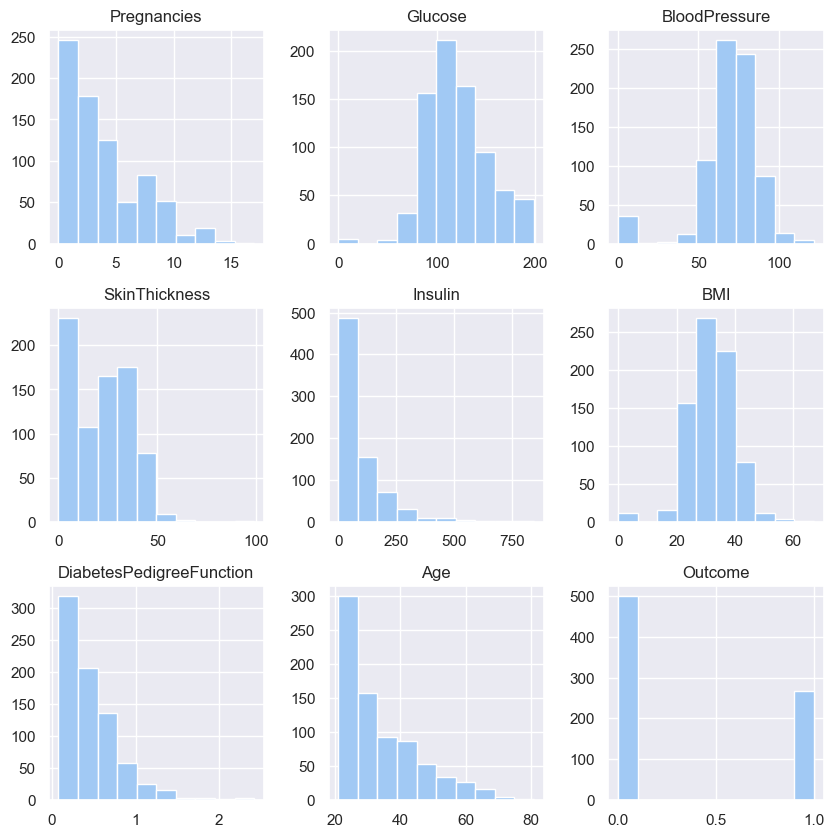

In [ ]:
pd.options.plotting.backend = 'matplotlib'
df.hist(figsize=(10,10))
plt.show()

### Media y desviación estándar

In [ ]:
#Seleccionar las filas
#mean = df_stats.iloc[1]
#std = df_stats.iloc[2]
#print(f"Mean:{mean}, std: {std}")
#std

In [ ]:
features_mean = df_stats['mean']
print(" #### Mean of every feature ####")
features_mean

 #### Mean of every feature ####


Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Name: mean, dtype: float64

#### Rescalado para gráficos

In [ ]:
features_mean_reshaped = np.array(features_mean).reshape(-1, 1)

standar_scaler = StandardScaler()

features_mean_scaled = standar_scaler.fit_transform(features_mean_reshaped)

print(" **** Rescaled mean of every feature ****")
features_mean_scaled

 **** Rescaled mean of every feature ****


array([[-1.05634701],
       [ 1.94906491],
       [ 0.61930704],
       [-0.62777141],
       [ 0.89389097],
       [-0.33361923],
       [-1.1429581 ],
       [-0.30156717]])

In [ ]:
features_std = df_stats['std']
print(" #### Standard desviation of every feature ####")
features_std

 #### Standard desviation of every feature ####


Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Name: std, dtype: float64

In [ ]:
features_std_reshaped = np.array(features_std).reshape(-1, 1)


features_std_scaled = mmscaler.fit_transform(features_std_reshaped)
print(" **** Rescaled standard desviation of every feature ****")
features_std_scaled

 **** Rescaled standard desviation of every feature ****


array([[0.02643964],
       [0.27535074],
       [0.16555596],
       [0.13593704],
       [1.        ],
       [0.06572671],
       [0.        ],
       [0.09945729]])

In [ ]:
ft_mean_df = pd.DataFrame({'Mean' :features_mean, 'Features':features})
ft_mean_df

,Mean,Features
Pregnancies,3.845052,Pregnancies
Glucose,120.894531,Glucose
BloodPressure,69.105469,BloodPressure
SkinThickness,20.536458,SkinThickness
Insulin,79.799479,Insulin
BMI,31.992578,BMI
DiabetesPedigreeFunction,0.471876,DiabetesPedigreeFunction
Age,33.240885,Age


In [ ]:
ft_std_df = pd.DataFrame({'Std' :features_std, 'Features':features})
ft_std_df

,Std,Features
Pregnancies,3.369578,Pregnancies
Glucose,31.972618,Glucose
BloodPressure,19.355807,BloodPressure
SkinThickness,15.952218,SkinThickness
Insulin,115.244002,Insulin
BMI,7.884160,BMI
DiabetesPedigreeFunction,0.331329,DiabetesPedigreeFunction
Age,11.760232,Age


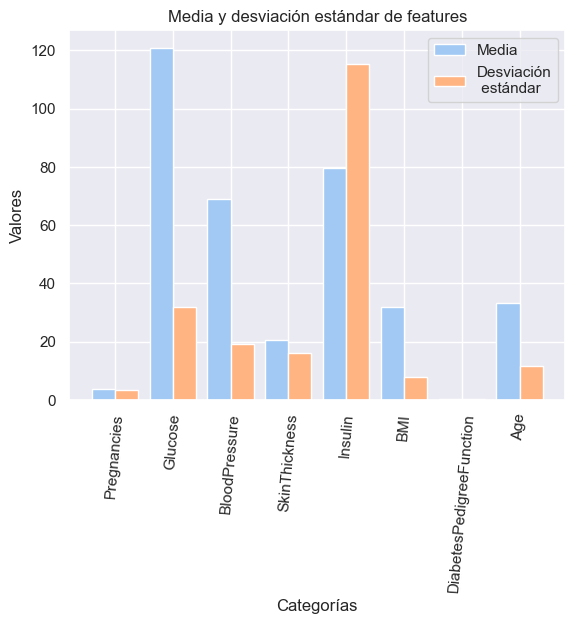

In [ ]:
columns = np.arange(len(features_df.columns)) #array([0, 1, 2, 3, 4, 5, 6, 7])

#Ancho de las barras
ancho = 0.4

# Crear las barras
plt.bar(columns, features_mean, width=ancho, label='Media')
plt.bar(columns + ancho, features_std, width=ancho, label='Desviación\n estándar')
# Añadir etiquetas, título y leyenda
plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Media y desviación estándar de features')
plt.xticks(columns + ancho/2, features, rotation=85)
plt.legend()

# Mostrar el gráfico
plt.show()

### Plotly - Gráfico de media y desviación estándar

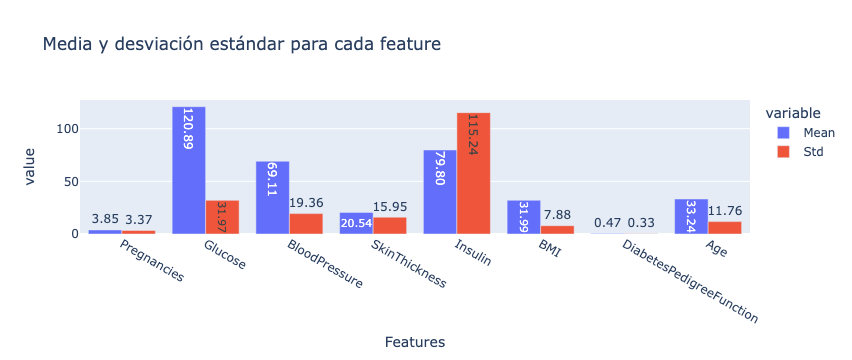

In [ ]:
grouped_mean_std_df = pd.DataFrame({
    'Mean': features_mean,
    'Std': features_std,
    'Features': features
})

# Crear el gráfico de barras agrupadas
fig = px.bar(grouped_mean_std_df,
             x='Features',
             y=['Mean', 'Std'],
             barmode='group',
             text_auto=".2f",
             title="Media y desviación estándar para cada feature")

# Mostrar el gráfico
fig.show()

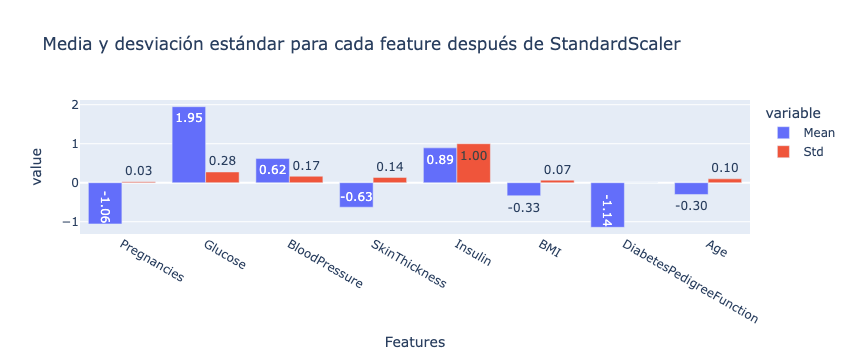

In [ ]:
grouped_mean_std_scaled_df = pd.DataFrame({
    'Mean': features_mean_scaled.flatten(),
    'Std': features_std_scaled.flatten(),
    'Features': features
})

# Crear el gráfico de barras agrupadas
fig = px.bar(grouped_mean_std_scaled_df,
             x='Features',
             y=['Mean', 'Std'],
             barmode='group',
             text_auto=".2f",
             title="Media y desviación estándar para cada feature después de StandardScaler")

# Mostrar el gráfico
fig.show()

### Boxplot definición

* Representación gráfica que muestra la distribución de un conjunto de datos. Este gráfico proporciona una forma visual de identificar la mediana, los cuartiles y los valores atípicos en el conjunto de datos.
* Especialmente útil para visualizar la dispersión y la simetría de un conjunto de datos, así como para identificar la presencia de valores atípicos. También proporciona una buena forma de comparar distribuciones entre diferentes grupos o categorías.

#### Boxplot para dos variables segun target

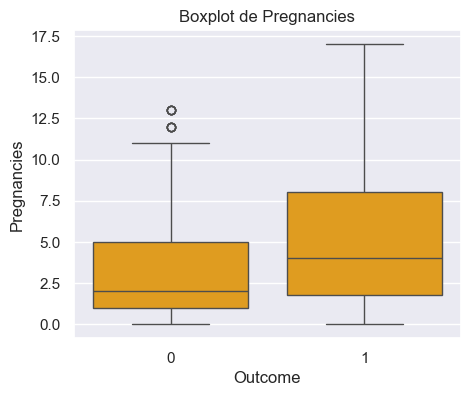

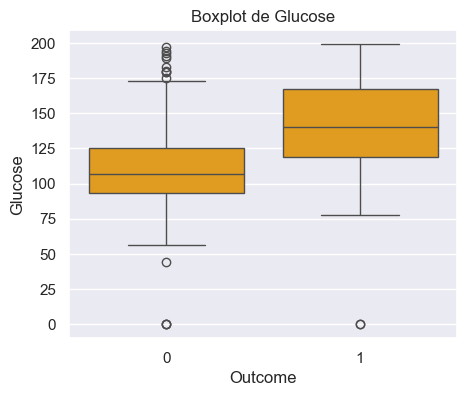

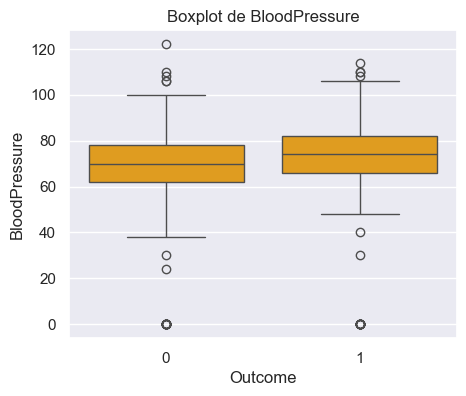

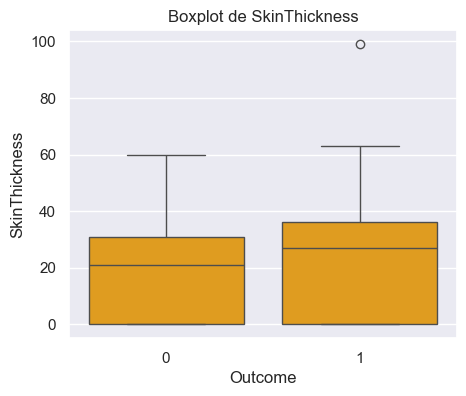

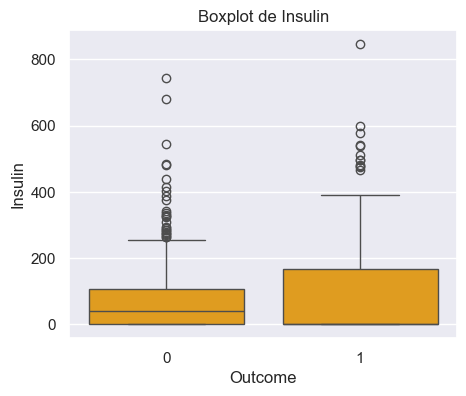

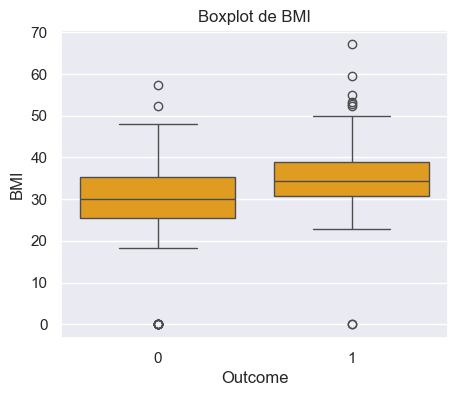

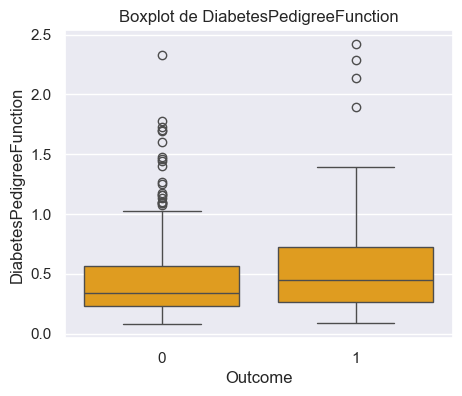

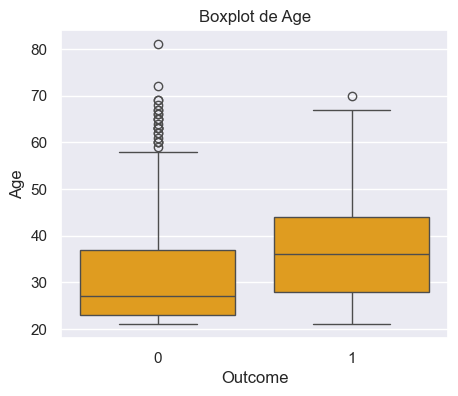

In [ ]:

pd.options.plotting.backend = 'matplotlib'
for i,feature in enumerate(features):
    plt.figure(figsize=(5,4))
    plt.title(f"Boxplot de {feature}")

    sns.boxplot(x=target, y=df[features[i]], color='orange')

    plt.savefig(f"{PATH}/graphics/boxplot/boxplot-{feature}.png", bbox_inches='tight', dpi=500)
    plt.show()

In [ ]:
random.choice(['green', 'blue'])

'blue'

#### Plotly

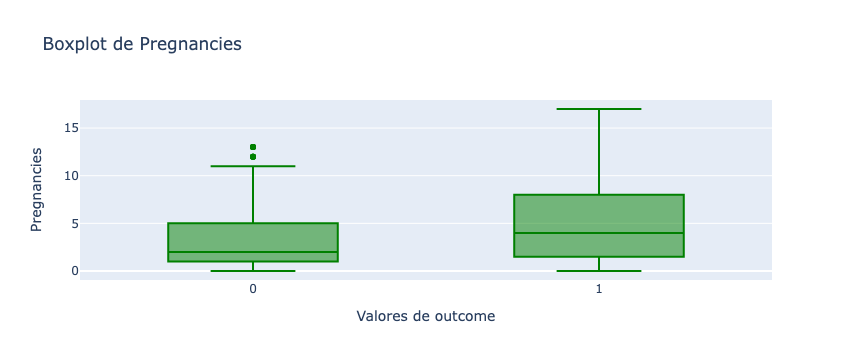

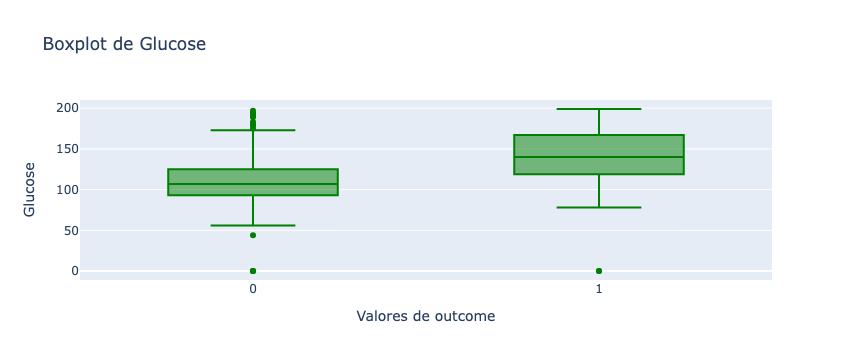

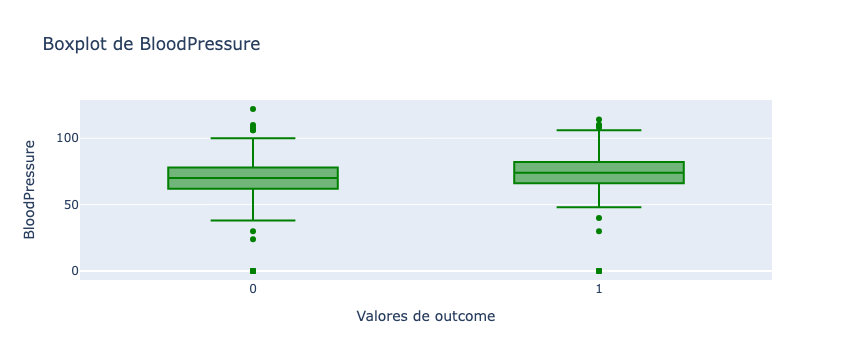

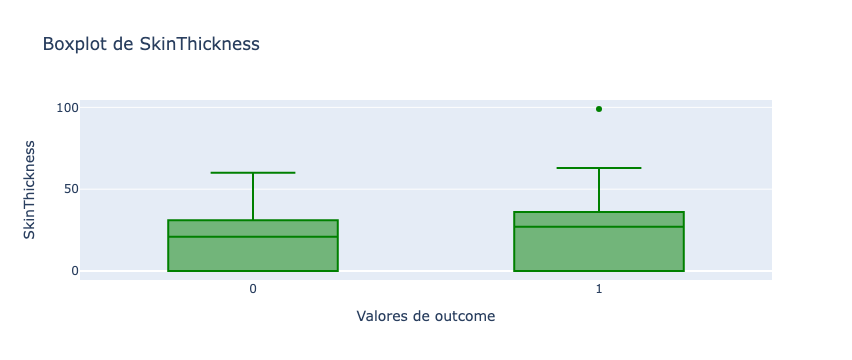

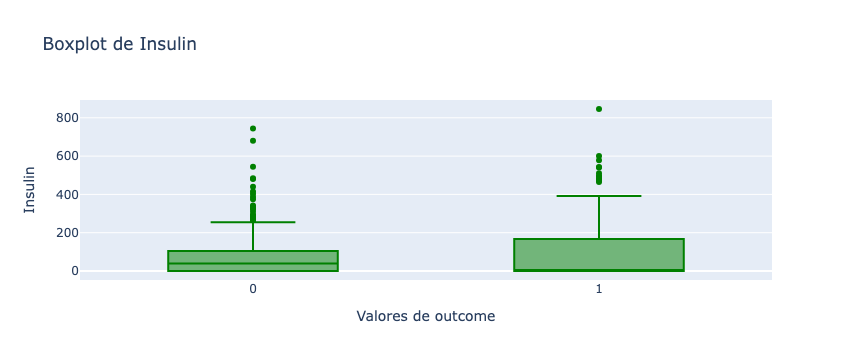

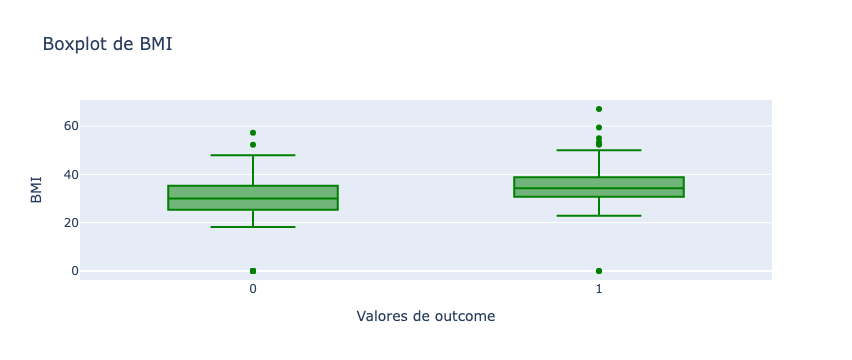

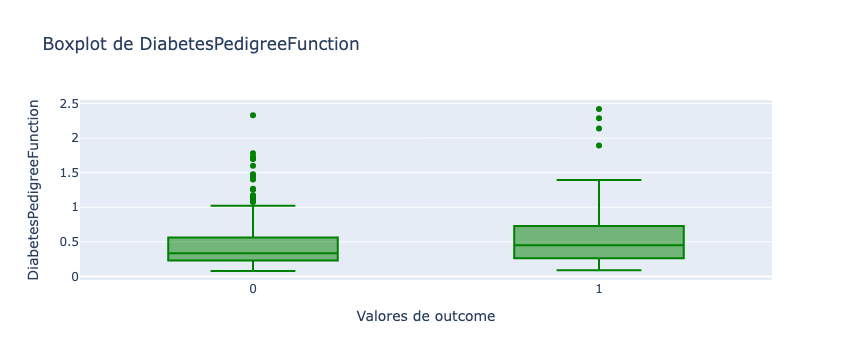

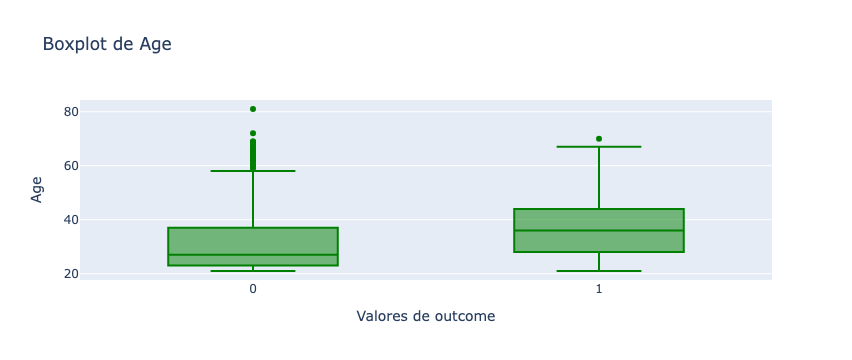

In [ ]:
pd.options.plotting.backend = 'plotly'

for i,feature in enumerate(features):
    fig = px.box(x=target,
                 y=df[features[i]],
                 title=f"Boxplot de {feature}",
                 labels={'x': "Valores de outcome", 'y':f"{features[i]}"},
                 color_discrete_sequence=['green']
                )
    fig.show()


### Manejo de valores atípicos

#### Reemplazo de filas con 0 con la media de la columna
Uso de la función `replace`  de Pandas

In [ ]:
features_replaced_df = features_df.copy(deep = True)
features_replaced_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

Glucose_mean = features_replaced_df[columns[0]].mean()
BloodPressure_mean = features_replaced_df[columns[1]].mean()
SkinThicknes_mean = features_replaced_df[columns[2]].median()
BMI_mean = features_replaced_df[columns[3]].mean()
Insulin_median = features_replaced_df[columns[4]].median()

features_replaced_df[columns[0]].replace(0, Glucose_mean, inplace=True)
features_replaced_df[columns[1]].replace(0, BloodPressure_mean, inplace=True)
features_replaced_df[columns[2]].replace(0, SkinThicknes_mean, inplace=True)
features_replaced_df[columns[3]].replace(0, BMI_mean, inplace=True)
features_replaced_df[columns[4]].replace(0, Insulin_median, inplace=True)
features_replaced_df.head(10).round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.00,35,79.8,33.6,0.63,50
1,1,85.0,66.00,29,79.8,26.6,0.35,31
2,8,183.0,64.00,23,79.8,23.3,0.67,32
3,1,89.0,66.00,23,94.0,28.1,0.17,21
4,0,137.0,40.00,35,168.0,43.1,2.29,33
5,5,116.0,74.00,23,79.8,25.6,0.20,30
6,3,78.0,50.00,32,88.0,31.0,0.25,26
7,10,115.0,69.11,23,79.8,35.3,0.13,29
8,2,197.0,70.00,45,543.0,30.5,0.16,53
9,8,125.0,96.00,23,79.8,32.0,0.23,54


#### Gráfico comparativo previa y posteriormente a la imputación

In [ ]:
def plot_overlaid_histograms(df_1, df_2, column, x_label='Valor', y_label='Frecuencia', color1='skyblue', color2='lightsalmon', savefig=False):
    """
    Plots a colum from two dataframes with matplotlib backend
    """
    pd.options.plotting.backend = 'matplotlib'
    title = f'Histogramas de {column} antes y después de la imputación'
    plt.title(title)

    df_1[column].hist(color=color1, label=f'{df_1[column].name} antes')
    df_2[column].hist(color=color2, label=f'{df_2[column].name} actualmente')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    if(savefig):
        plt.savefig(f'{PATH}/graphics/overlaid/{title}', bbox_inches='tight')
    plt.show()

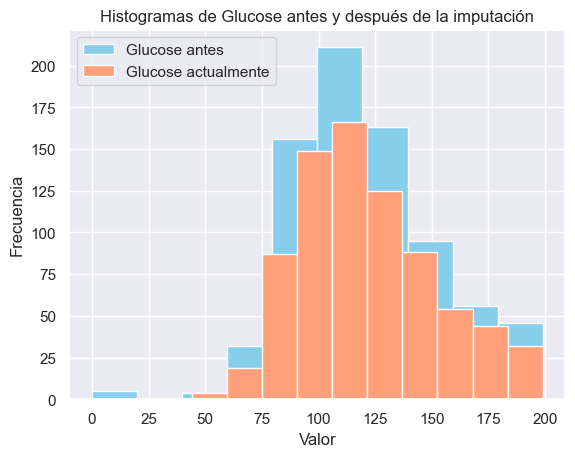

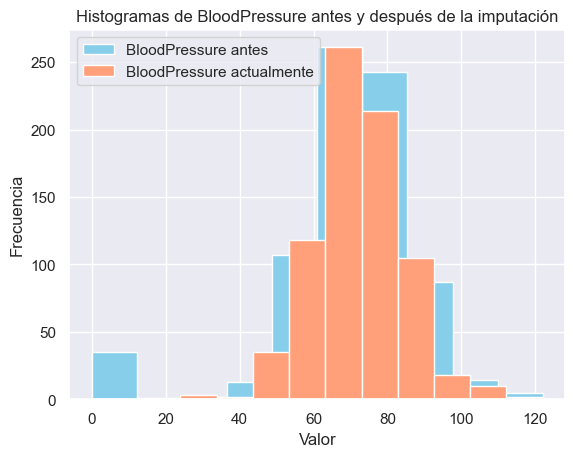

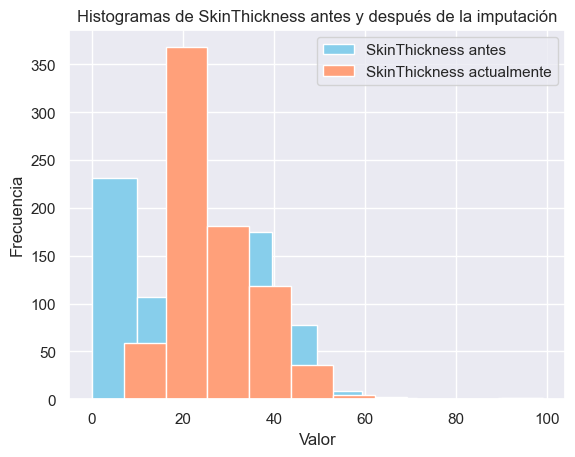

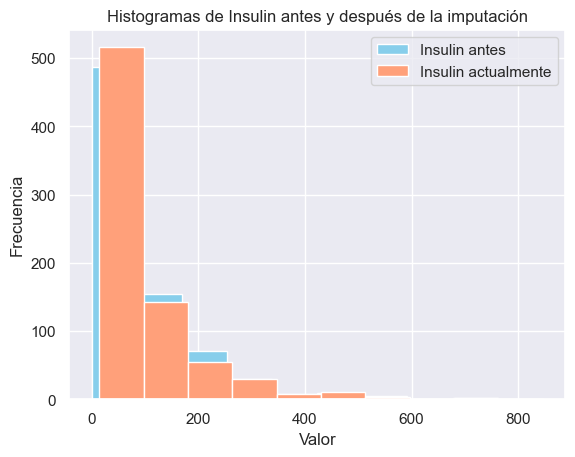

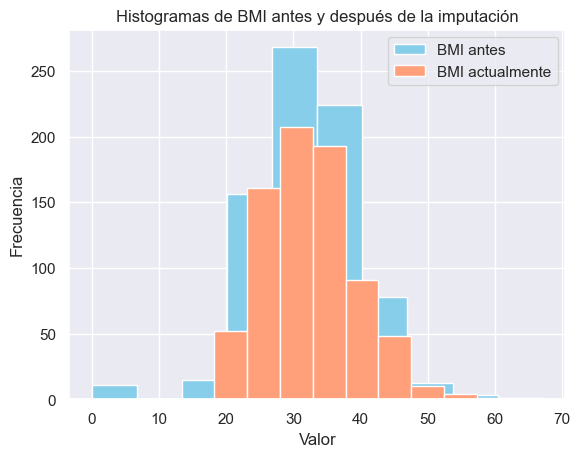

In [ ]:
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i,_ in enumerate(columns):
    plot_overlaid_histograms(features_df, features_replaced_df, columns[i], savefig=True)

In [ ]:
def plot_overlaid_histograms_plotly(df_3, df_4, column):
    """
    Plots a colum from two dataframes with Plotly backend
    """
    pd.options.plotting.backend = 'plotly'
    fig = graph_objects.Figure()

    fig.add_trace(graph_objects.Histogram(x=df_3[column], name=f'{column} antes'))
    fig.add_trace(graph_objects.Histogram(x=df_4[column], name=f'{column} después'))

    fig.update_layout(barmode='stack',
                      title_text = f'Histogramas de {column} antes y después de la imputación')
    fig.update_xaxes(title_text=f'{column}')

    fig.update_traces(opacity=0.8)
    fig.show()

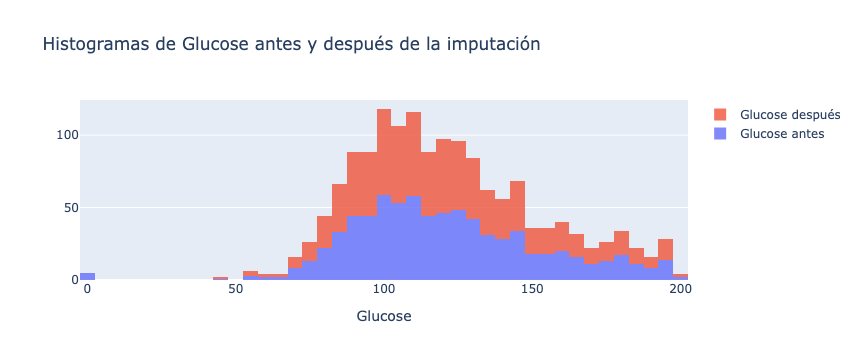

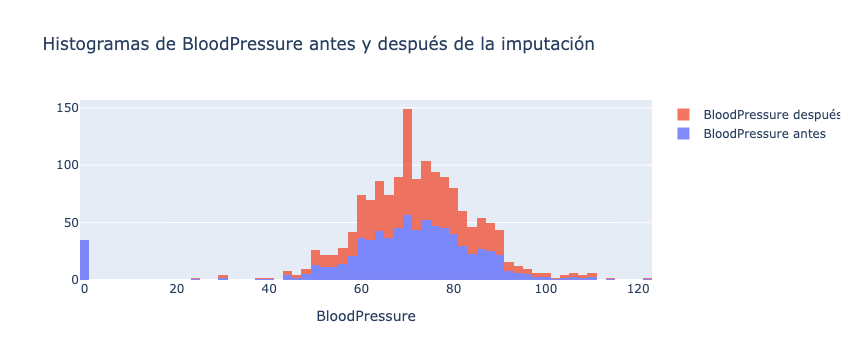

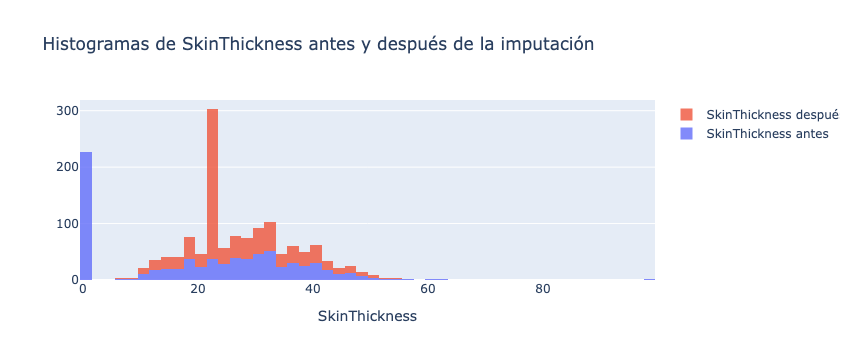

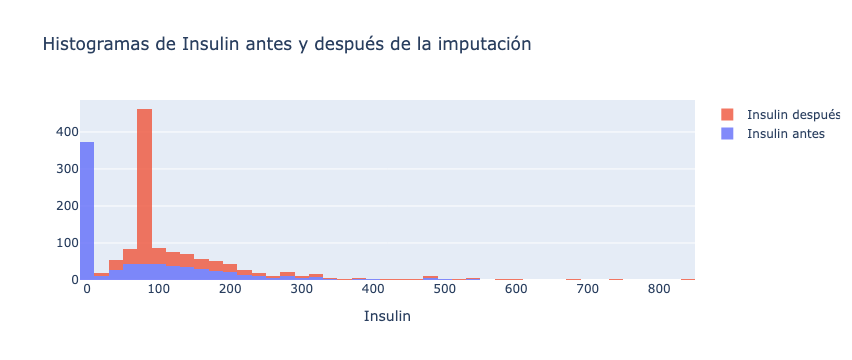

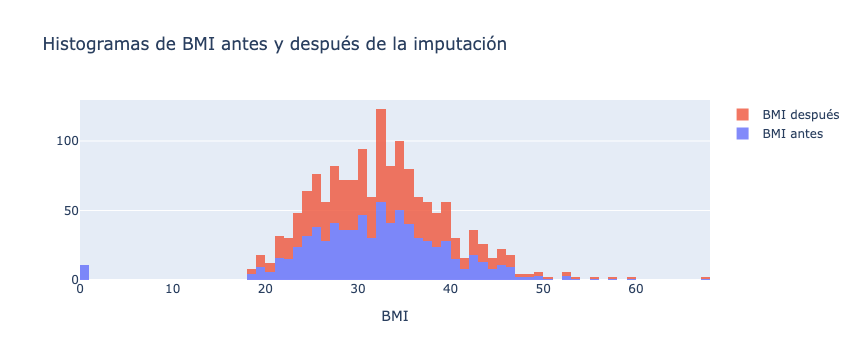

In [ ]:
#columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i,_ in enumerate(columns):
    plot_overlaid_histograms_plotly(features_df, features_replaced_df, columns[i])

# Modelos

## Functions

### Get individual metrics(metric, conf_matrix)

In [ ]:
def get_individual_metrics(metric, conf_matrix):
    """
    Get individual metrics from a confusion matrix.

    Parameters
    -------------------
    :param (str) metric: the metric to be obtained from the confusion matrix [true-pos, false-pos, true-neg, false-neg]

    :param (numpy.ndarray) conf_matrix: confusion matrix from which the metric is to be obtained

    :return: Returns the position of the confusion matrix passed as a text string parameter.

    :rtype: numpy.int64\n

    """
    if(metric=="true-pos"):
        return conf_matrix[0][0]
    elif (metric=="true-neg"):
        return conf_matrix[1][1]
    elif (metric=="false-pos"):
        return conf_matrix[0][1]
    elif (metric=="false-neg"):
        return conf_matrix[0][0]

### Get metrics labels (confusion_matrix)

In [ ]:
def get_metrics_labels(confusion_matrix):
    """

    Get metrics labels from confusion matrix

    Parameters
    --------------
    :param (numpy.ndarray) confusion_matrix: Confusion matrix to be obtained the metrics

    :return: Returns a tuple with the metrics contained in the confusion matrix passed as parameter

    :rtype: tuple

    """
    true_positive = confusion_matrix[0][0]
    false_positive = confusion_matrix[0][1]
    false_negative = confusion_matrix[1][0]
    true_negative = confusion_matrix[1][1]
    return (true_positive, false_positive, true_negative, false_negative)

### Metrics command(action, confusion_matrix)

In [ ]:
def metrics_command(action, confusion_matrix):
    """

    Command function that can print on the console,
    return the metrics or return the same confusion matrix but with percentages at each position
    depending on the value of the action parameter

    :param (str) action: Action to be taken with the confusion matrix. ['get','percentages', 'print']
                    'get': returns sensitivity & specificity from the 'confusion_matrix' parameter
                    'percentages': returns 'confusion_matrix' passed as parameters but with metrics rates in each position
                    'print': prints sensitivity and specificity on the console

    :param (numpy.ndarray) confusion_matrix: Confusion matrix with which operations will be performed depending on `action` value.

    """

    (true_positive, false_positive, true_negative, false_negative) = get_metrics_labels(confusion_matrix)

    sensitivity = true_positive / (true_positive + false_positive) # true positive rate
    specificity = true_negative / (false_negative + true_negative) # true negative rate

    fp_percentage = abs(1 - specificity) # false positive rate

    fn_percentage = abs(1 - sensitivity) # false negative rate

    if(tensor_util.is_tensor(sensitivity)):
        cm_percentages = np.array([[sensitivity, fn_percentage],
                         [fp_percentage, specificity]])
    else:
        cm_percentages = np.array([[sensitivity.round(4), fn_percentage.round(4)],
                         [fp_percentage.round(4), specificity.round(4)]])
    if (action == "get"):
        return sensitivity, specificity
    elif(action == "percentages"):
        return cm_percentages
    elif(action == "print"):
        print(f"Sensibilidad (tasa verdaderos positivos): {sensitivity:.6f}")
        print(f"Especificidad (tasa verdaderos negativos): {specificity:.6f}")
    else:
        print(" Parameter'action' not valid from: (get, percentages, print)")

### Print metrics summary(sensibility_list, AUC_list, specificity_list, model_name)

In [ ]:
def print_metrics_summary(sensibility_list, AUC_list, specificity_list, model_name):
    """

    Predefined scheme to print the summary (mean and std desv)
    of the metrics of interest
    (sensitivity, specificity & AUC (Area Under the Curve)) on console


    Parameters
    ---------------
    :param (list) sensibility_list: list of sensitivities to be printed

    :param (list) AUC_list: list of sensitivities to be printed

    :param (list) specificity_list: list of sensitivities to be printed

    :param (str) model_name: name of the model from which the metrics
    passed as a parameter are to be printed

    """

    print()
    print(f"-------------    {model_name}       -------------- ")
    print("##################### RESUMEN #####################")
    sens_avg = np.mean(sensibility_list)
    sens_std = np.std(sensibility_list)
    print(f"# Sensibilidad promedio: {sens_avg:.4f}                   #")
    print(f"# Desviación estándar de Sensibilidad: {sens_std:.4f}     #")
    print("# --------------------------------------------    #")
    auc_avg = np.mean(AUC_list)
    auc_std = np.std(AUC_list)
    print(f"# AUC promedio: {auc_avg:.4f}                            #")
    print(f"# Desviación estándar AUC: {auc_std:.4f}                 #")
    print("# --------------------------------------------    #")
    spec_avg = np.mean(specificity_list)
    spec_std = np.std(specificity_list)
    print(f"# Especificidad promedio: {spec_avg:.4f}                  #")
    print(f"# Desviación estándar especificidad: {spec_std:.4f}       #")
    print()

In [ ]:
def train_model_iterative(features, target, iterations, classifier):
    """
    Trains the model passed in 'classifier' iteratively
    as many times as defined in 'iterations'.

    Parameters
    ---------------
    :param (pandas.*.DataFrame) features: features that the model must learn

    :param (pandas.*.Series) target: target column to be predicted

    :param (int) iterations: times to train the 'classifier' passed as parameter

    :param classifier: model to be trained

    :return: Tuple of (sensibilities, specificities, AUC_scores, classifier, classifier_cm)\n

    """

    X=df_normalized
    y=df['Outcome']
    sensibilities = []
    specificities = []
    AUC_scores = []
    print(f"Entrenando el modelo {iterations} veces...")
    print()
    for i in range(iterations):
        # Dividir los datos en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, stratify=y)

        # Entrenar el modelo
        classifier.fit(X_train, y_train)

        # Hacer predicciones en el conjunto de prueba
        y_pred = classifier.predict(X_test)

        classifier_cm =  metrics.confusion_matrix(y_test, y_pred)

        sensibility, specificity = metrics_command("get", classifier_cm)
        sensibilities.append(sensibility)
        specificities.append(specificity)

        # predicciones de probabilidad en el conjunto de test, solo la columna positiva (1)
        y_probs = classifier.predict_proba(X_test)[:, 1]
        auc_score = metrics.roc_auc_score(y_test, y_probs)
        AUC_scores.append(auc_score)

        print(f'Iteración {i+1}: Sensibilidad = {sensibility:.4f}, Especificidad = {specificity:.4f}, AUC: {auc_score:.4f}')
    print()
    print("######## Entrenamiento finalizado!!! ########")
    return (sensibilities, specificities, AUC_scores, classifier, classifier_cm)

## Modelos basados en machine learning

### Random forest

In [ ]:
X=df_normalized
y=df['Outcome']
(rf_sensibilities, rf_specificities, rf_AUC_scores, rf_classifier, rf_cm) = \
train_model_iterative(features=X,
                      target=y,
                      iterations=50,
                      classifier=RandomForestClassifier(n_estimators=50,random_state=42))

Entrenando el modelo 50 veces...

Iteración 1: Sensibilidad = 0.9200, Especificidad = 0.6111, AUC: 0.8736
Iteración 2: Sensibilidad = 0.8400, Especificidad = 0.4630, AUC: 0.7899
Iteración 3: Sensibilidad = 0.8800, Especificidad = 0.5000, AUC: 0.7837
Iteración 4: Sensibilidad = 0.8900, Especificidad = 0.5370, AUC: 0.7932
Iteración 5: Sensibilidad = 0.7200, Especificidad = 0.6667, AUC: 0.7643
Iteración 6: Sensibilidad = 0.8800, Especificidad = 0.5926, AUC: 0.8180
Iteración 7: Sensibilidad = 0.9400, Especificidad = 0.5370, AUC: 0.8560
Iteración 8: Sensibilidad = 0.8700, Especificidad = 0.5370, AUC: 0.8164
Iteración 9: Sensibilidad = 0.7700, Especificidad = 0.5741, AUC: 0.7594
Iteración 10: Sensibilidad = 0.8600, Especificidad = 0.7222, AUC: 0.8689
Iteración 11: Sensibilidad = 0.8400, Especificidad = 0.6667, AUC: 0.8274
Iteración 12: Sensibilidad = 0.8500, Especificidad = 0.5926, AUC: 0.8383
Iteración 13: Sensibilidad = 0.8800, Especificidad = 0.6667, AUC: 0.8653
Iteración 14: Sensibilidad

In [ ]:
print_metrics_summary(rf_sensibilities, rf_AUC_scores, rf_specificities, "Random forest")


-------------    Random forest       -------------- 
##################### RESUMEN #####################
# Sensibilidad promedio: 0.8604                   #
# Desviación estándar de Sensibilidad: 0.0429     #
# --------------------------------------------    #
# AUC promedio: 0.8225                            #
# Desviación estándar AUC: 0.0285                 #
# --------------------------------------------    #
# Especificidad promedio: 0.5744                  #
# Desviación estándar especificidad: 0.0655       #



### Support vector machines (SVM)

In [ ]:
(svm_rbf_sensibilities_1000, svm_rbf_specificities_1000,
 svm_rbf_AUC_scores_1000, svm_rbf_classifier_1000, svm_rbf_cm_1000) = \
train_model_iterative(X, y, 50, svm.SVC(kernel="rbf", C=1000, probability=True))

Entrenando el modelo 50 veces...

Iteración 1: Sensibilidad = 0.8500, Especificidad = 0.6296, AUC: 0.7881
Iteración 2: Sensibilidad = 0.7800, Especificidad = 0.5556, AUC: 0.7713
Iteración 3: Sensibilidad = 0.7900, Especificidad = 0.4259, AUC: 0.5811
Iteración 4: Sensibilidad = 0.7200, Especificidad = 0.5370, AUC: 0.6600
Iteración 5: Sensibilidad = 0.5800, Especificidad = 0.5370, AUC: 0.6411
Iteración 6: Sensibilidad = 0.7800, Especificidad = 0.6481, AUC: 0.7306
Iteración 7: Sensibilidad = 0.7700, Especificidad = 0.5370, AUC: 0.6688
Iteración 8: Sensibilidad = 0.7500, Especificidad = 0.5926, AUC: 0.7328
Iteración 9: Sensibilidad = 0.7200, Especificidad = 0.5370, AUC: 0.6517
Iteración 10: Sensibilidad = 0.7700, Especificidad = 0.5000, AUC: 0.7261
Iteración 11: Sensibilidad = 0.7000, Especificidad = 0.6852, AUC: 0.7470
Iteración 12: Sensibilidad = 0.6900, Especificidad = 0.5926, AUC: 0.7161
Iteración 13: Sensibilidad = 0.7600, Especificidad = 0.5926, AUC: 0.7050
Iteración 14: Sensibilidad

In [ ]:
(svm_linear_sensibilities_1000, svm_linear_specificities_1000,
 svm_linear_AUC_scores_1000, svm_linear_classifier_1000, svm_linear_cm_1000) = \
train_model_iterative(X, y, 50, svm.SVC(kernel="linear", C=1000, probability=True))

Entrenando el modelo 50 veces...

Iteración 1: Sensibilidad = 0.8800, Especificidad = 0.5741, AUC: 0.8876
Iteración 2: Sensibilidad = 0.9200, Especificidad = 0.5370, AUC: 0.8157
Iteración 3: Sensibilidad = 0.9100, Especificidad = 0.5185, AUC: 0.7920
Iteración 4: Sensibilidad = 0.8700, Especificidad = 0.4815, AUC: 0.8033
Iteración 5: Sensibilidad = 0.7900, Especificidad = 0.6111, AUC: 0.7826
Iteración 6: Sensibilidad = 0.8800, Especificidad = 0.5370, AUC: 0.8069
Iteración 7: Sensibilidad = 0.9500, Especificidad = 0.5185, AUC: 0.8665
Iteración 8: Sensibilidad = 0.8800, Especificidad = 0.5926, AUC: 0.8383
Iteración 9: Sensibilidad = 0.7900, Especificidad = 0.4815, AUC: 0.7472
Iteración 10: Sensibilidad = 0.8500, Especificidad = 0.6852, AUC: 0.8662
Iteración 11: Sensibilidad = 0.9100, Especificidad = 0.6667, AUC: 0.8330
Iteración 12: Sensibilidad = 0.8800, Especificidad = 0.5556, AUC: 0.8420
Iteración 13: Sensibilidad = 0.8700, Especificidad = 0.6296, AUC: 0.8519
Iteración 14: Sensibilidad

In [ ]:
(svm_linear_sens_100, svm_linear_spec_100, svm_linear_AUC_scores_100,
 svm_linear_clf_100, svm_linear_cm_100) = \
train_model_iterative(X, y, 50, svm.SVC(kernel="linear", C=100, probability=True))

Entrenando el modelo 50 veces...

Iteración 1: Sensibilidad = 0.8800, Especificidad = 0.5741, AUC: 0.8876
Iteración 2: Sensibilidad = 0.9200, Especificidad = 0.5370, AUC: 0.8156
Iteración 3: Sensibilidad = 0.9100, Especificidad = 0.5185, AUC: 0.7920
Iteración 4: Sensibilidad = 0.8700, Especificidad = 0.4815, AUC: 0.8030
Iteración 5: Sensibilidad = 0.7900, Especificidad = 0.6111, AUC: 0.7824
Iteración 6: Sensibilidad = 0.8800, Especificidad = 0.5370, AUC: 0.8074
Iteración 7: Sensibilidad = 0.9500, Especificidad = 0.5185, AUC: 0.8665
Iteración 8: Sensibilidad = 0.8800, Especificidad = 0.5926, AUC: 0.8380
Iteración 9: Sensibilidad = 0.7900, Especificidad = 0.4815, AUC: 0.7470
Iteración 10: Sensibilidad = 0.8500, Especificidad = 0.6852, AUC: 0.8663
Iteración 11: Sensibilidad = 0.9100, Especificidad = 0.6667, AUC: 0.8327
Iteración 12: Sensibilidad = 0.8800, Especificidad = 0.5370, AUC: 0.8417
Iteración 13: Sensibilidad = 0.8700, Especificidad = 0.6296, AUC: 0.8522
Iteración 14: Sensibilidad

In [ ]:
(svm_rbf_sensibilities_100, svm_rbf_specificities_100,
 svm_rbf_AUC_scores_100, svm_rbf_classifier_100, svm_rbf_cm_100) = \
train_model_iterative(X, y, 50, svm.SVC(kernel="rbf", C=100, probability=True))

Entrenando el modelo 50 veces...

Iteración 1: Sensibilidad = 0.8700, Especificidad = 0.6111, AUC: 0.8156
Iteración 2: Sensibilidad = 0.8000, Especificidad = 0.5556, AUC: 0.7687
Iteración 3: Sensibilidad = 0.7700, Especificidad = 0.4074, AUC: 0.5995
Iteración 4: Sensibilidad = 0.8000, Especificidad = 0.5185, AUC: 0.6878
Iteración 5: Sensibilidad = 0.6500, Especificidad = 0.5370, AUC: 0.6330
Iteración 6: Sensibilidad = 0.7800, Especificidad = 0.6111, AUC: 0.7626
Iteración 7: Sensibilidad = 0.8400, Especificidad = 0.5556, AUC: 0.7026
Iteración 8: Sensibilidad = 0.7800, Especificidad = 0.5556, AUC: 0.7535
Iteración 9: Sensibilidad = 0.7200, Especificidad = 0.5185, AUC: 0.6733
Iteración 10: Sensibilidad = 0.7600, Especificidad = 0.5370, AUC: 0.7615
Iteración 11: Sensibilidad = 0.7400, Especificidad = 0.7037, AUC: 0.7706
Iteración 12: Sensibilidad = 0.7800, Especificidad = 0.6296, AUC: 0.7765
Iteración 13: Sensibilidad = 0.7700, Especificidad = 0.5185, AUC: 0.6869
Iteración 14: Sensibilidad

In [ ]:
print_metrics_summary(svm_rbf_sensibilities_1000,
                      svm_rbf_specificities_1000,
                      svm_rbf_AUC_scores_1000, "SVM kernel=RBF C=1000")

print_metrics_summary(svm_linear_sensibilities_1000,
                      svm_linear_specificities_1000,
                      svm_linear_AUC_scores_1000, "SVM kernel=linear C=1000")


print_metrics_summary(svm_rbf_sensibilities_100,
                      svm_rbf_specificities_100,
                      svm_rbf_AUC_scores_100, "SVM kernel=RBF C=100")

print_metrics_summary(svm_linear_sens_100,
                      svm_linear_spec_100,
                      svm_linear_AUC_scores_100, "SVM kernel=linear C=100")


-------------    SVM kernel=RBF C=1000       -------------- 
##################### RESUMEN #####################
# Sensibilidad promedio: 0.7522                   #
# Desviación estándar de Sensibilidad: 0.0476     #
# --------------------------------------------    #
# AUC promedio: 0.5667                            #
# Desviación estándar AUC: 0.0599                 #
# --------------------------------------------    #
# Especificidad promedio: 0.7095                  #
# Desviación estándar especificidad: 0.0394       #


-------------    SVM kernel=linear C=1000       -------------- 
##################### RESUMEN #####################
# Sensibilidad promedio: 0.8796                   #
# Desviación estándar de Sensibilidad: 0.0351     #
# --------------------------------------------    #
# AUC promedio: 0.5663                            #
# Desviación estándar AUC: 0.0491                 #
# --------------------------------------------    #
# Especificidad promedio: 0.8321        

## Modelos basados en deep learning (DL)

### Redes neuronales artificiales profundas

In [ ]:
X = df_normalized

y = df['Outcome']

In [ ]:

#primera división en train y otro subconjunto
X_train, X_temporal, y_train, y_temporal = train_test_split(X, y, test_size=0.3, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temporal, y_temporal, test_size=0.5)

# Crear modelo
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.columns.size))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compilar modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/50
17/17 [==============================] - 1s 20ms/step - loss: 0.6158 - accuracy: 0.6555 - val_loss: 0.6230 - val_accuracy: 0.6724
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 0.5790 - accuracy: 0.6592 - val_loss: 0.6047 - val_accuracy: 0.6810
Epoch 3/50
17/17 [==============================] - 0s 7ms/step - loss: 0.5521 - accuracy: 0.6760 - val_loss: 0.5905 - val_accuracy: 0.6810
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 0.5323 - accuracy: 0.7095 - val_loss: 0.5806 - val_accuracy: 0.7155
Epoch 5/50
17/17 [==============================] - 0s 6ms/step - loss: 0.5170 - accuracy: 0.7356 - val_loss: 0.5728 - val_accuracy: 0.7241
Epoch 6/50
17/17 [==============================] - 0s 7ms/step - loss: 0.5036 - accuracy: 0.7542 - val_loss: 0.5668 - val_accuracy: 0.7500
Epoch 7/50
17/17 [==============================] - 0s 6ms/step - loss: 0.4943 - accuracy: 0.7561 - val_loss: 0.5631 - val_accuracy: 0.7328
Epoch 8/50
17/17 [=

In [ ]:
y_pred_prob = model.predict(X_test).ravel()

# Convierte las probabilidades predichas en clases predichas
# (0 o 1, si es mayor que 0.5 se almacena un 1 como entero sino un 0 como entero)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Calcula la matriz de confusión
nn_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)

# Calcula la sensibilidad y la especificidad
metrics_command("print", nn_confusion_matrix)

# Calcula el AUC
nn_auc = metrics.roc_auc_score(y_test, y_pred_prob)
print('NN AUC : ', nn_auc)

4/4 [==============================] - 0s 1ms/step
Sensibilidad (tasa verdaderos positivos): 0.835616
Especificidad (tasa verdaderos negativos): 0.738095
NN AUC :  0.8662752772341813


In [ ]:
nn_sensibility, nn_specificity = metrics_command("get", nn_confusion_matrix)

In [ ]:
print()
print(f"----------    Neural networks    ----------")
print("############### RESUMEN ###############")
print(f"# Sensibilidad: {nn_sensibility:.4f}                #")
print(f"# Especificidad: {nn_specificity:.4f}               #")
print(f"# Area Under ROC Curve: {nn_auc:.4f}        #")


----------    Neural networks    ----------
############### RESUMEN ###############
# Sensibilidad: 0.8356                #
# Especificidad: 0.7381               #
# Area Under ROC Curve: 0.8663        #


In [ ]:
%load_ext tensorboard
%tensorboard --logdir {logdir}

In [ ]:
metrics_dict = model.evaluate(X_test, y_test, return_dict=True)

4/4 [==============================] - 0s 3ms/step - loss: 0.4473 - accuracy: 0.8000


In [ ]:
metrics_command("print", nn_confusion_matrix)

Sensibilidad (tasa verdaderos positivos): 0.835616
Especificidad (tasa verdaderos negativos): 0.738095


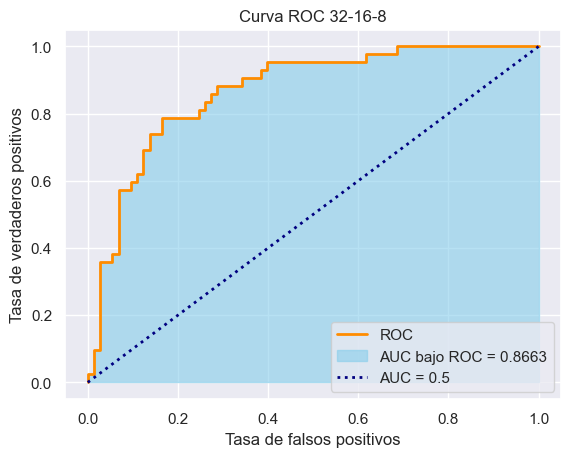

In [ ]:

false_positive_rates, true_positive_rates, _ = metrics.roc_curve(y_test, y_pred_prob)

arch="32-16-8"
# Traza la curva ROC
plt.figure()
plt.plot(false_positive_rates, true_positive_rates, color='darkorange', lw=2, label="ROC")
plt.fill_between(false_positive_rates, true_positive_rates, color='skyblue', label='AUC bajo ROC = %0.4f' % nn_auc, alpha=0.6)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle=':', label="AUC = 0.5")
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title(f'Curva ROC {arch}')
plt.legend(loc="lower right")
plt.savefig(f'{PATH}/graphics/RRNN/AUC-roc-{arch}.png', bbox_inches='tight')
plt.show()

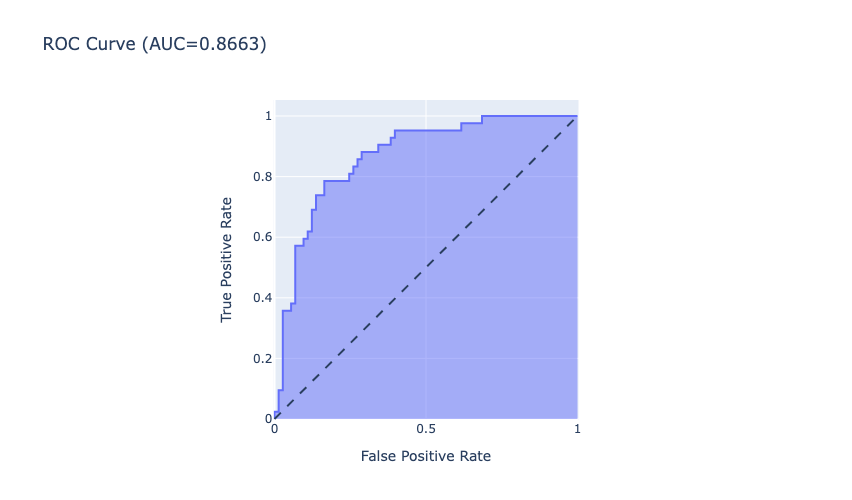

In [ ]:
fig = px.area(
    x=false_positive_rates, y=true_positive_rates,
    title=f'ROC Curve (AUC={nn_auc:.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

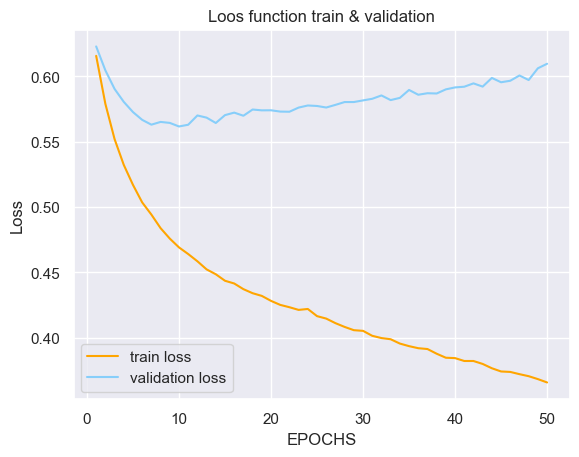

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1) # +1 debido a que el límite superior en la función range() es exclusivo

plt.figure()
plt.plot(epochs, loss, color="orange", label='train loss')
plt.plot(epochs, val_loss, color="lightskyblue", label='validation loss')
plt.title('Loos function train & validation')
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.legend()
plt.savefig(f'{PATH}/graphics/RRNN/loss-function{arch}.png', bbox_inches='tight')
plt.show()

In [ ]:
plot_loss_df = pd.DataFrame({'epochs':epochs, 'loss':loss, 'val_loss':val_loss})
plot_loss_df.head(2)

,epochs,loss,val_loss
0,1,0.615797,0.623001
1,2,0.579041,0.604698


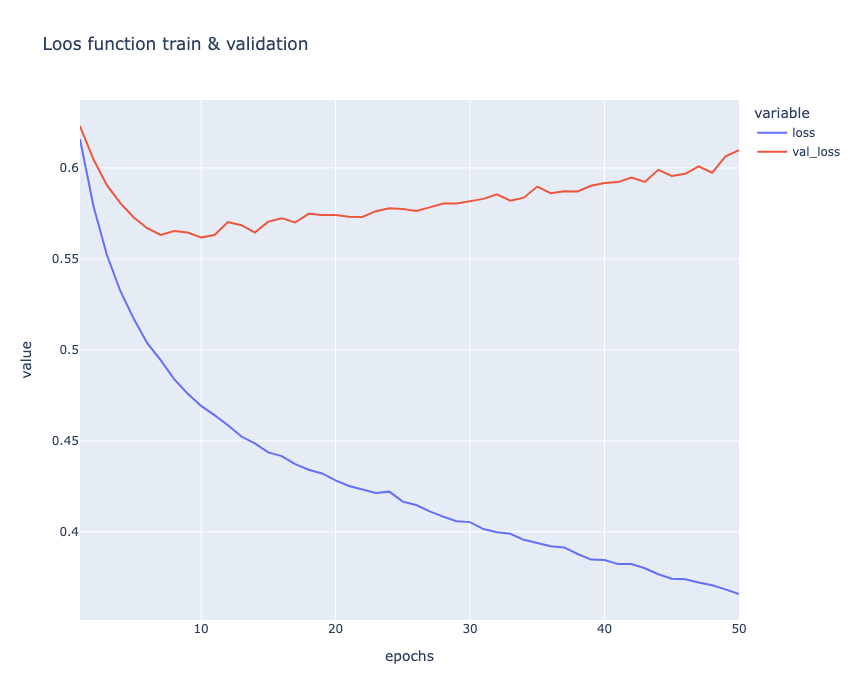

In [ ]:
fig = px.line(plot_loss_df, x='epochs', y=['loss', 'val_loss'], title='Loos function train & validation', height=700, width=600)
fig.show()

#### Confusion matrix DL

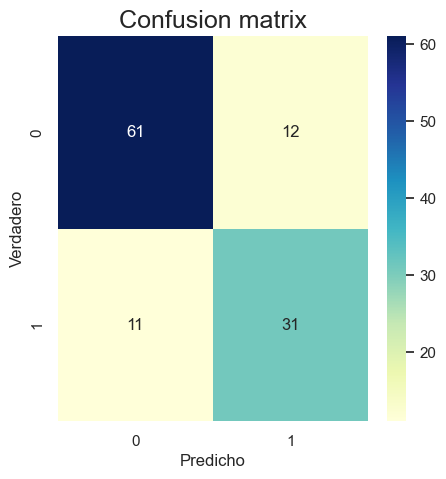

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(nn_confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion matrix", fontdict={'fontsize':18})
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.savefig(f'{PATH}/graphics/RRNN/confusion-matrix-nn.png', bbox_inches='tight')

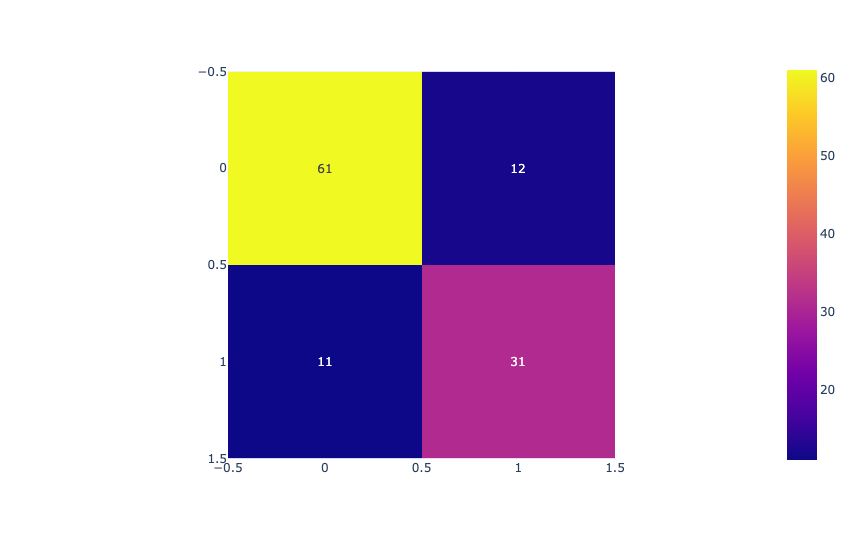

In [ ]:
px.imshow(nn_confusion_matrix, text_auto=True, height=550, width=550)


# Referencias

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
* https://keras.io/guides/sequential_model/
* https://matplotlib.org/stable/
* https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

* https://seaborn.pydata.org/index.html

* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

* https://pypi.org/project/dataframe-image/

* https://plotly.com/python/plotly-express/

* https://plotly.com/python/bar-charts/

* https://plotly.com/python/figure-factories/

* https://plotly.com/python/graph-objects/

* https://pandas.pydata.org/docs/

* https://numpy.org/doc/stable/
  
* https://plotly.com/python/line-and-scatter/